In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'Preprocessed_Dataset.csv'
data = pd.read_csv(file_path)

In [3]:
print("Dataset Columns (Variables):")
print(data.columns)

Dataset Columns (Variables):
Index(['Country', 'Age Group', 'Gender', 'Urban/Rural', 'Daily SM Usage (hrs)',
       'Most Used SM Platform', 'Frequency of SM Use',
       'Likes Received (per post)', 'Comments Received (per post)',
       'Shares Received (per post)', 'Peer Comparison Frequency (1-10)',
       'Social Anxiety Level (1-10)', 'Socioeconomic Status',
       'Education Level', 'State', 'Body Image Impact (1-10)',
       'Sleep Quality Impact (1-10)', 'Self Confidence Impact (1-10)',
       'Cyberbullying Experience (1-10)', 'Anxiety Levels (1-10)'],
      dtype='object')


In [4]:
# 1. Variables
# Summary statistics
print("Summary Statistics of Numerical Variables:")
print(data.describe())

Summary Statistics of Numerical Variables:
       Daily SM Usage (hrs)  Likes Received (per post)  \
count         340916.000000              340916.000000   
mean               6.245035                 504.145625   
std                3.318339                 285.881019   
min                0.500000                  10.000000   
25%                3.370000                 257.000000   
50%                6.240000                 504.000000   
75%                9.120000                 752.000000   
max               12.000000                 999.000000   

       Comments Received (per post)  Shares Received (per post)  \
count                 340916.000000               340916.000000   
mean                     249.431807                  149.477446   
std                      144.418097                   86.669715   
min                        0.000000                    0.000000   
25%                      124.000000                   74.000000   
50%                      250.000

In [5]:
#Categorical columns separately
categorical_columns = data.select_dtypes(include=['object']).columns

# For each categorical column, check the unique values and their counts
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())

print("\nSummary of Categorical Variables using describe:")
print(data[categorical_columns].describe())


Column: Country
Country
Laos           31154
Cambodia       31140
Malaysia       31073
Myanmar        31070
Thailand       31050
Brunei         31041
East Timor     30930
Philippines    30913
Singapore      30866
Indonesia      30858
Vietnam        30821
Name: count, dtype: int64

Column: Age Group
Age Group
56-65    68384
36-45    68304
46-55    68235
26-35    68015
18-25    67978
Name: count, dtype: int64

Column: Gender
Gender
Male      170758
Female    170158
Name: count, dtype: int64

Column: Urban/Rural
Urban/Rural
Rural    170730
Urban    170186
Name: count, dtype: int64

Column: Most Used SM Platform
Most Used SM Platform
Twitter      68375
WeChat       68283
Instagram    68210
TikTok       68118
Facebook     67930
Name: count, dtype: int64

Column: Frequency of SM Use
Frequency of SM Use
Monthly    85577
Daily      85215
Weekly     85128
Rarely     84996
Name: count, dtype: int64

Column: Socioeconomic Status
Socioeconomic Status
High      113827
Middle    113550
Low       11

In [6]:
print("\nDataset Summary:")
print(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340916 entries, 0 to 340915
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Country                           340916 non-null  object 
 1   Age Group                         340916 non-null  object 
 2   Gender                            340916 non-null  object 
 3   Urban/Rural                       340916 non-null  object 
 4   Daily SM Usage (hrs)              340916 non-null  float64
 5   Most Used SM Platform             340916 non-null  object 
 6   Frequency of SM Use               340916 non-null  object 
 7   Likes Received (per post)         340916 non-null  float64
 8   Comments Received (per post)      340916 non-null  float64
 9   Shares Received (per post)        340916 non-null  float64
 10  Peer Comparison Frequency (1-10)  340916 non-null  float64
 11  Social Anxiety Level (1-10)       

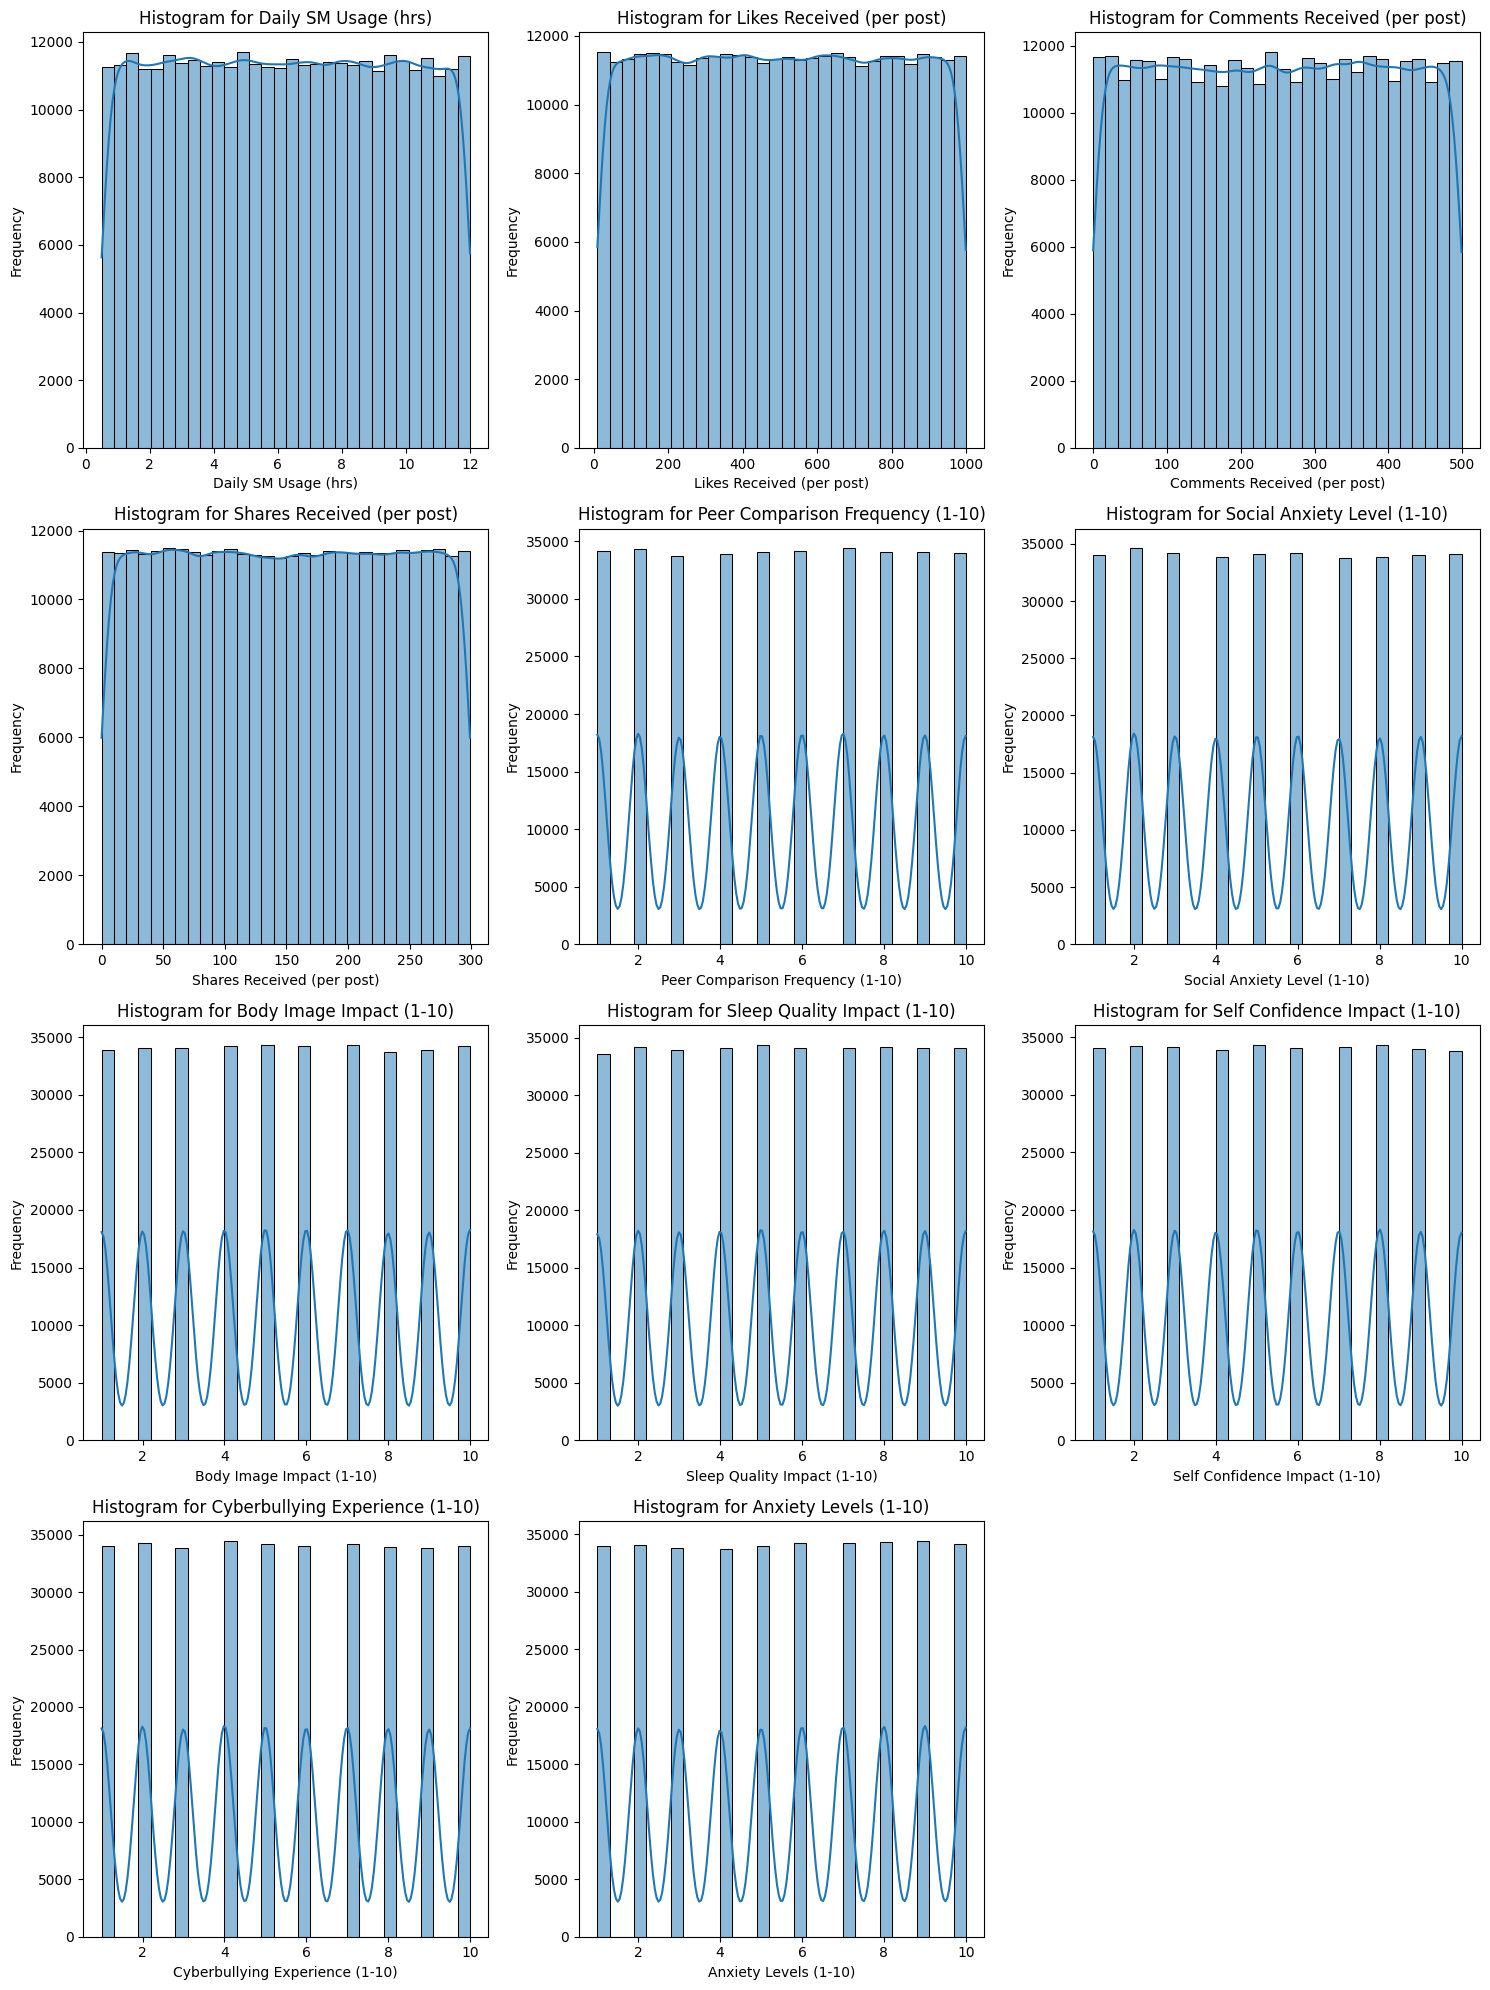

In [7]:
# Visualizations
# Histograms for numerical variables

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3  #number of columns per row
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0) 

# Create subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Loop through numerical columns and create histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

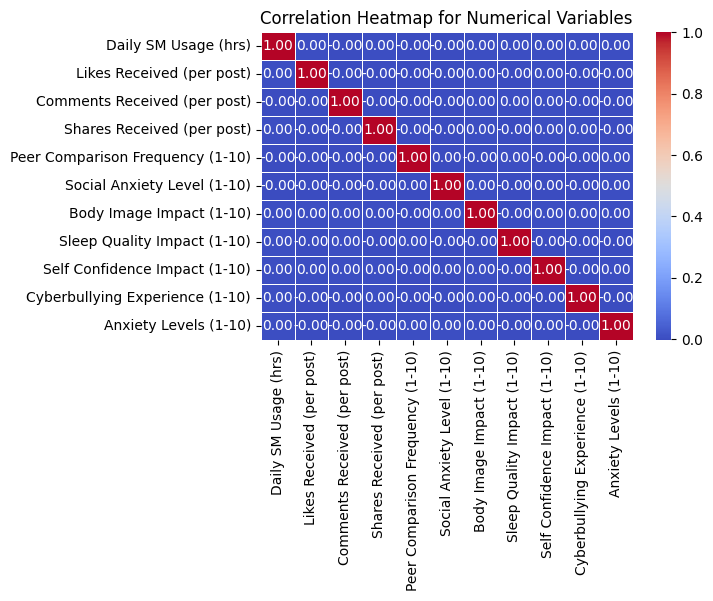

In [8]:
#Correlation Heatmap for Numerical Variables
plt.figure(figsize=(6, 4))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


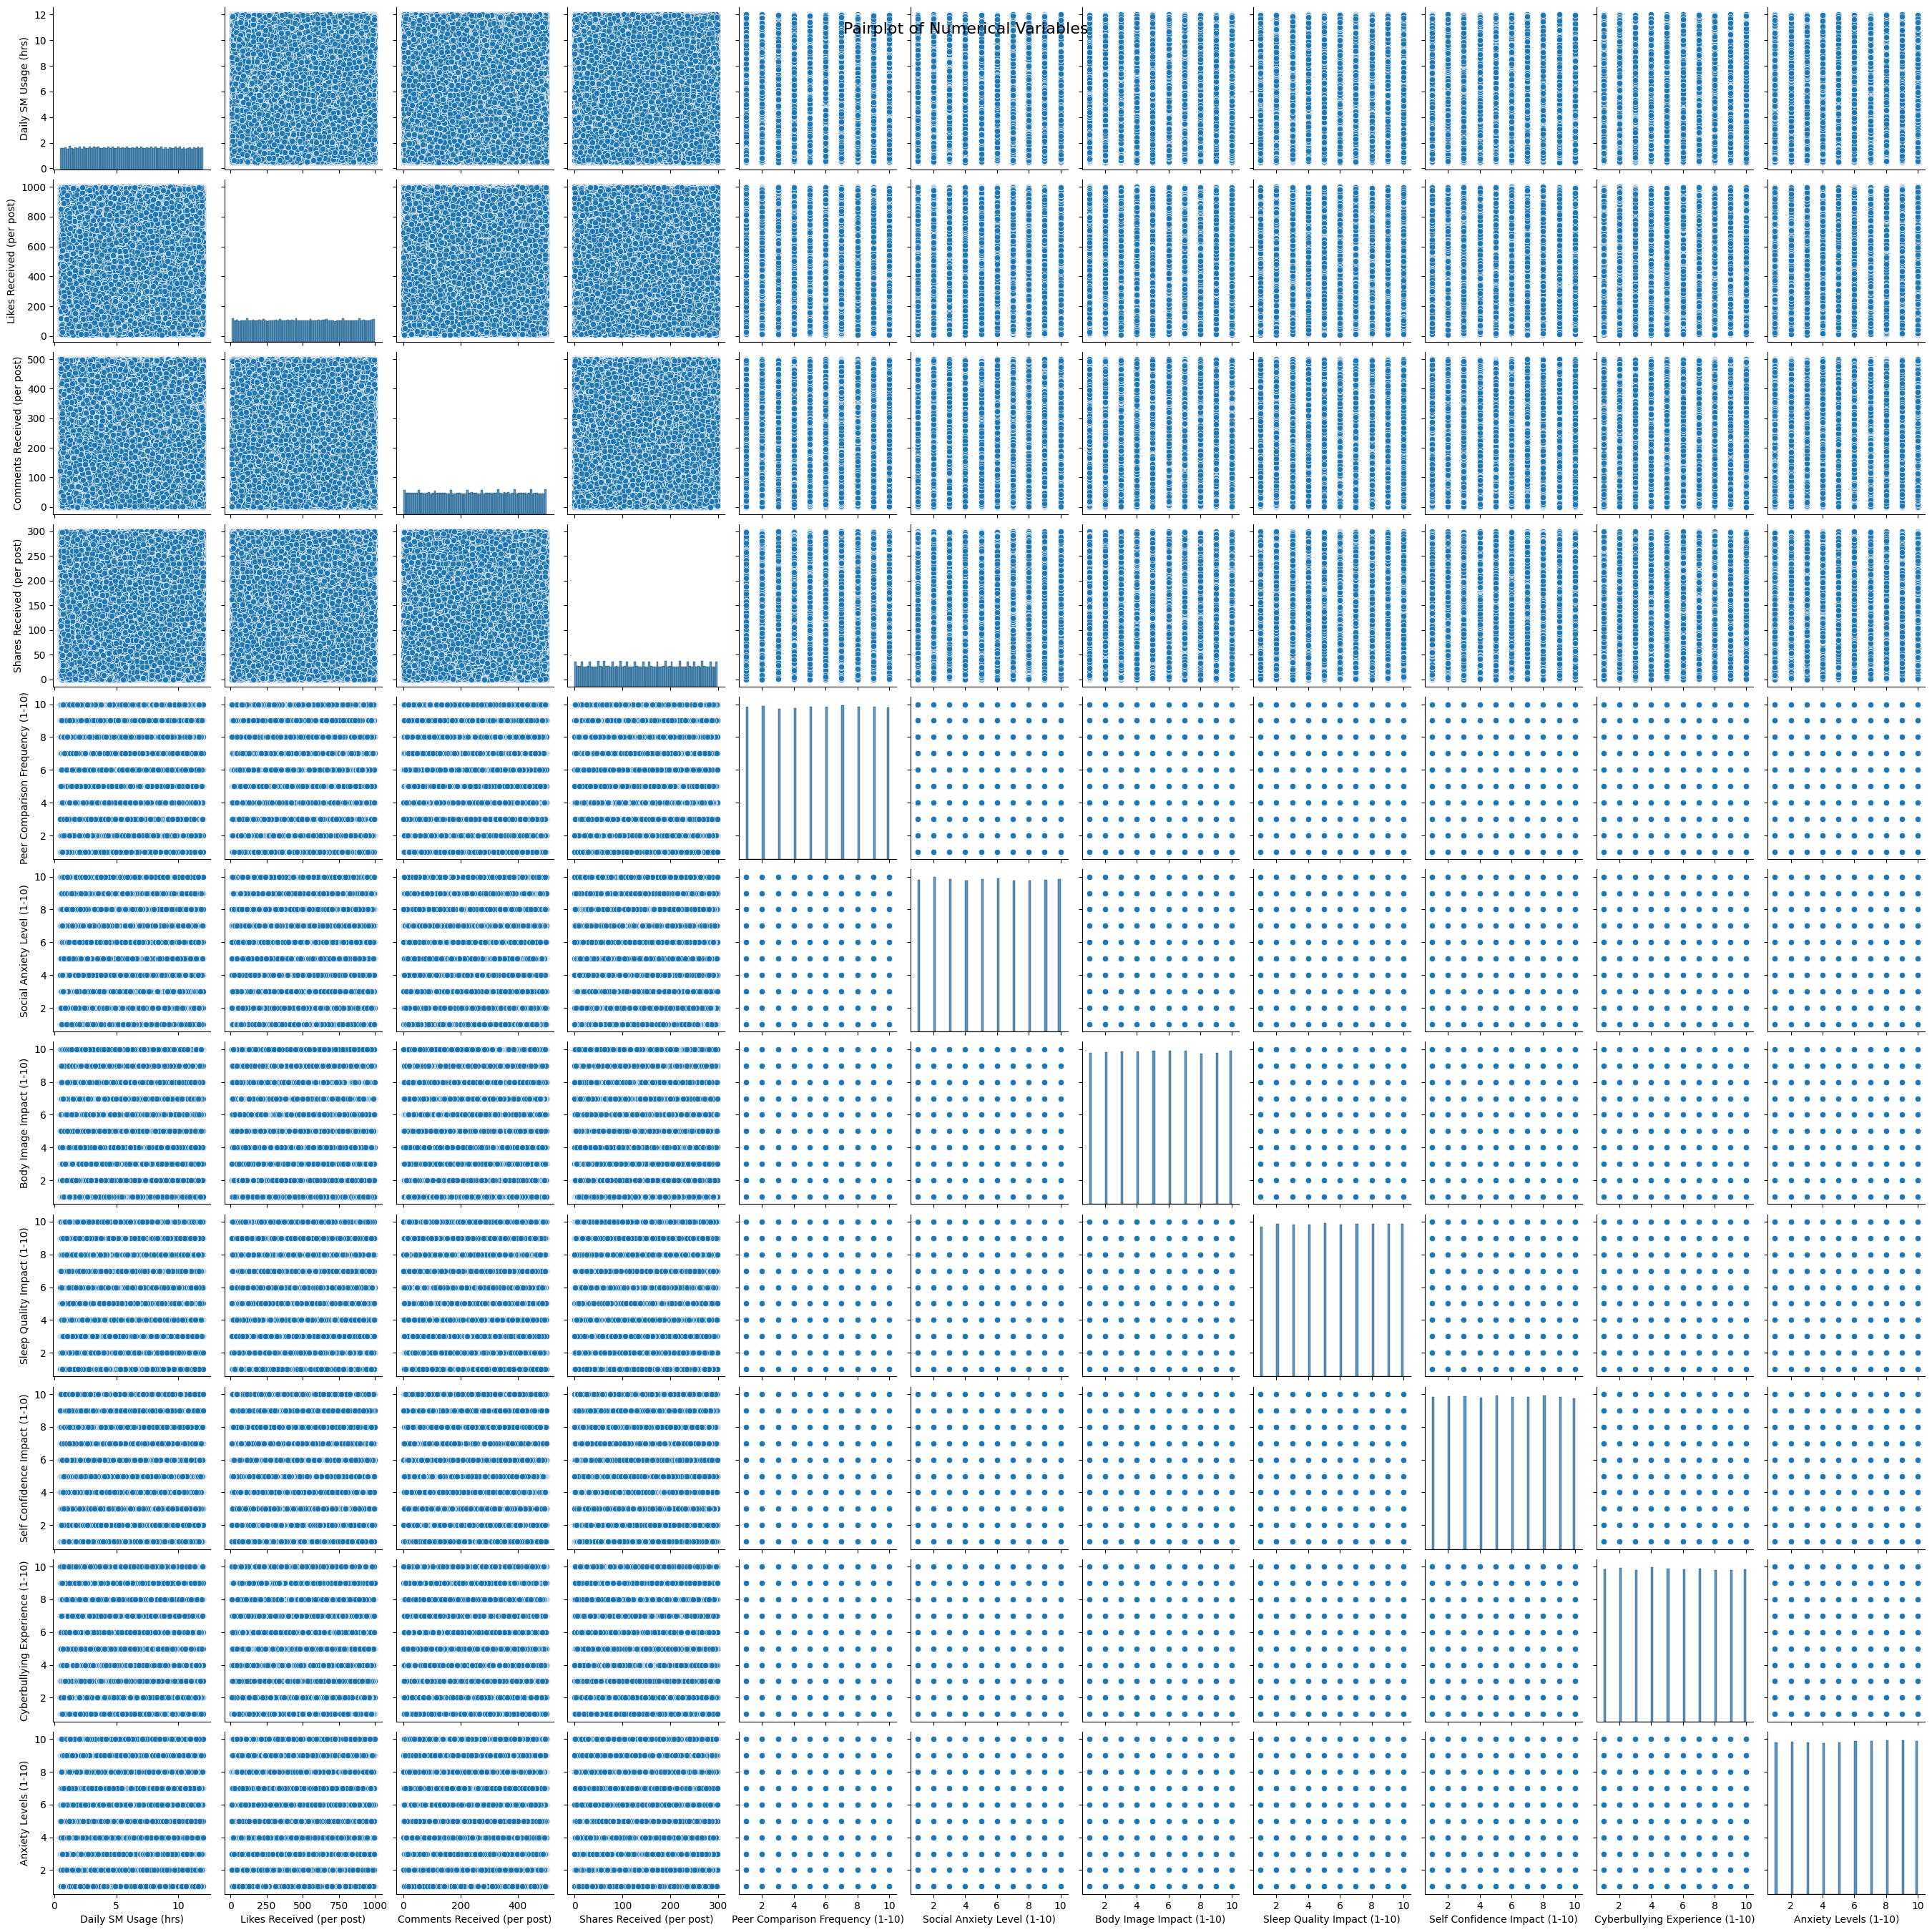

In [9]:
# Pairplot: Relationships Between Numerical Variables
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', size=16)
plt.show()

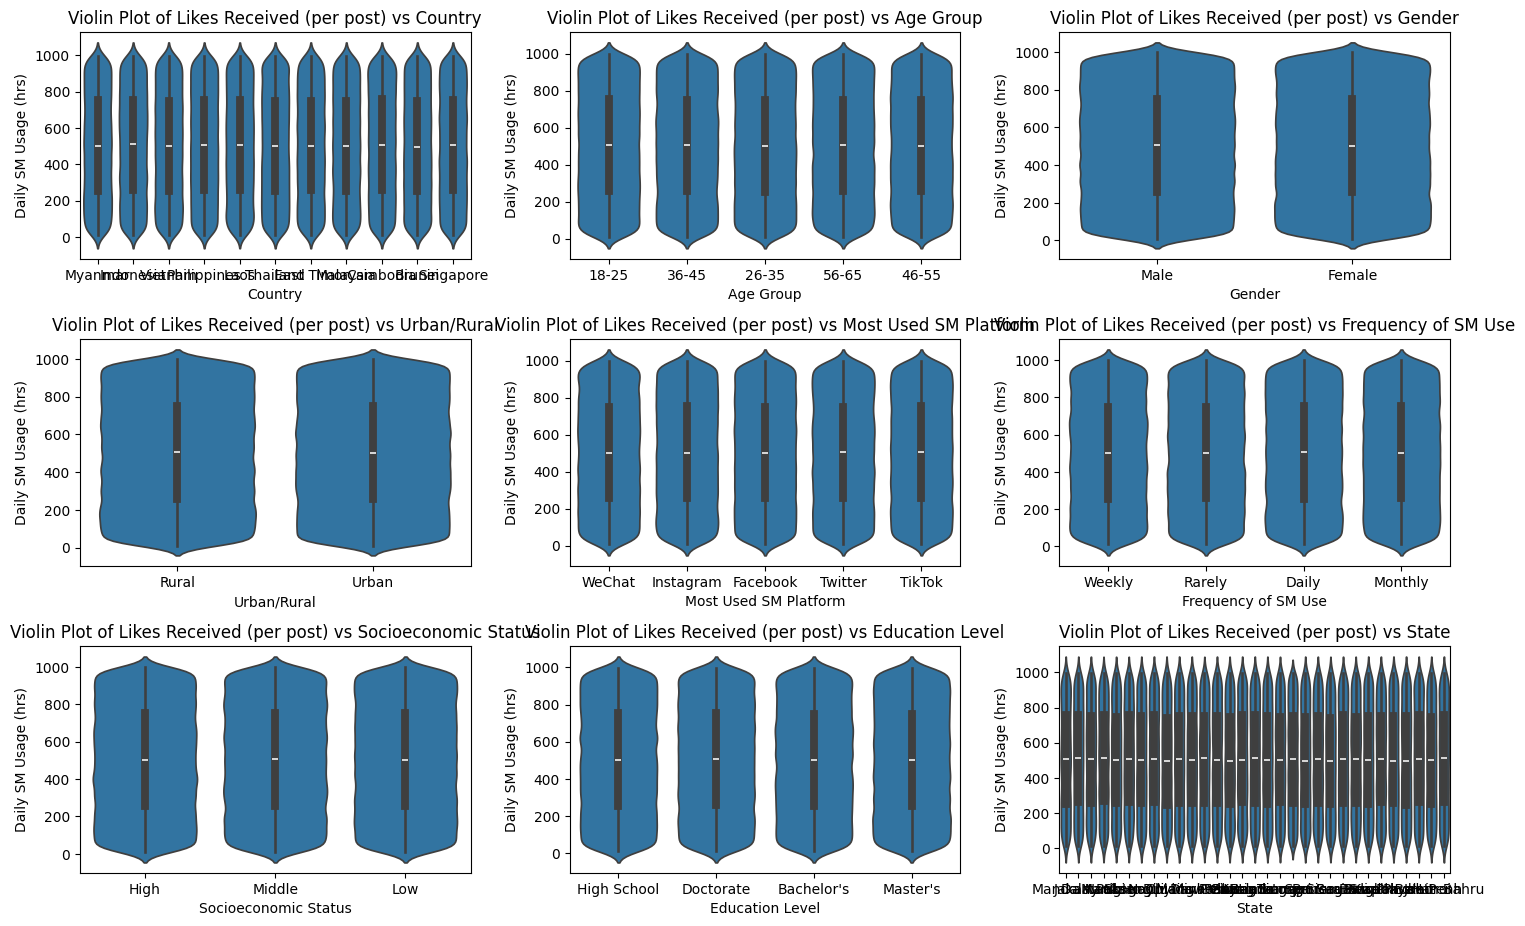

In [10]:
# Assuming 'data' is your dataset and 'numerical_columns' contains the list of numerical columns
numerical_columns = ['Daily SM Usage (hrs)', 'Likes Received (per post)', 'Comments Received (per post)', 'Shares Received (per post)']

# Assuming categorical variables are strings or objects in your dataset
categorical_columns = data.select_dtypes(include=['object']).columns

# Calculate the number of rows and columns for subplots
n_rows = (len(categorical_columns) // 3) + 1  # Adjust layout based on the number of categorical columns
n_cols = 3  # This assumes you want up to 3 plots per row

# Create violin plots for each categorical column against a numerical column
plt.figure(figsize=(15, 12))
for i, cat_col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x=cat_col, y=data[numerical_columns[1]], data=data)  # Use first numerical column here
    plt.title(f'Violin Plot of {numerical_columns[1]} vs {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(numerical_columns[0])

plt.tight_layout()
plt.show()

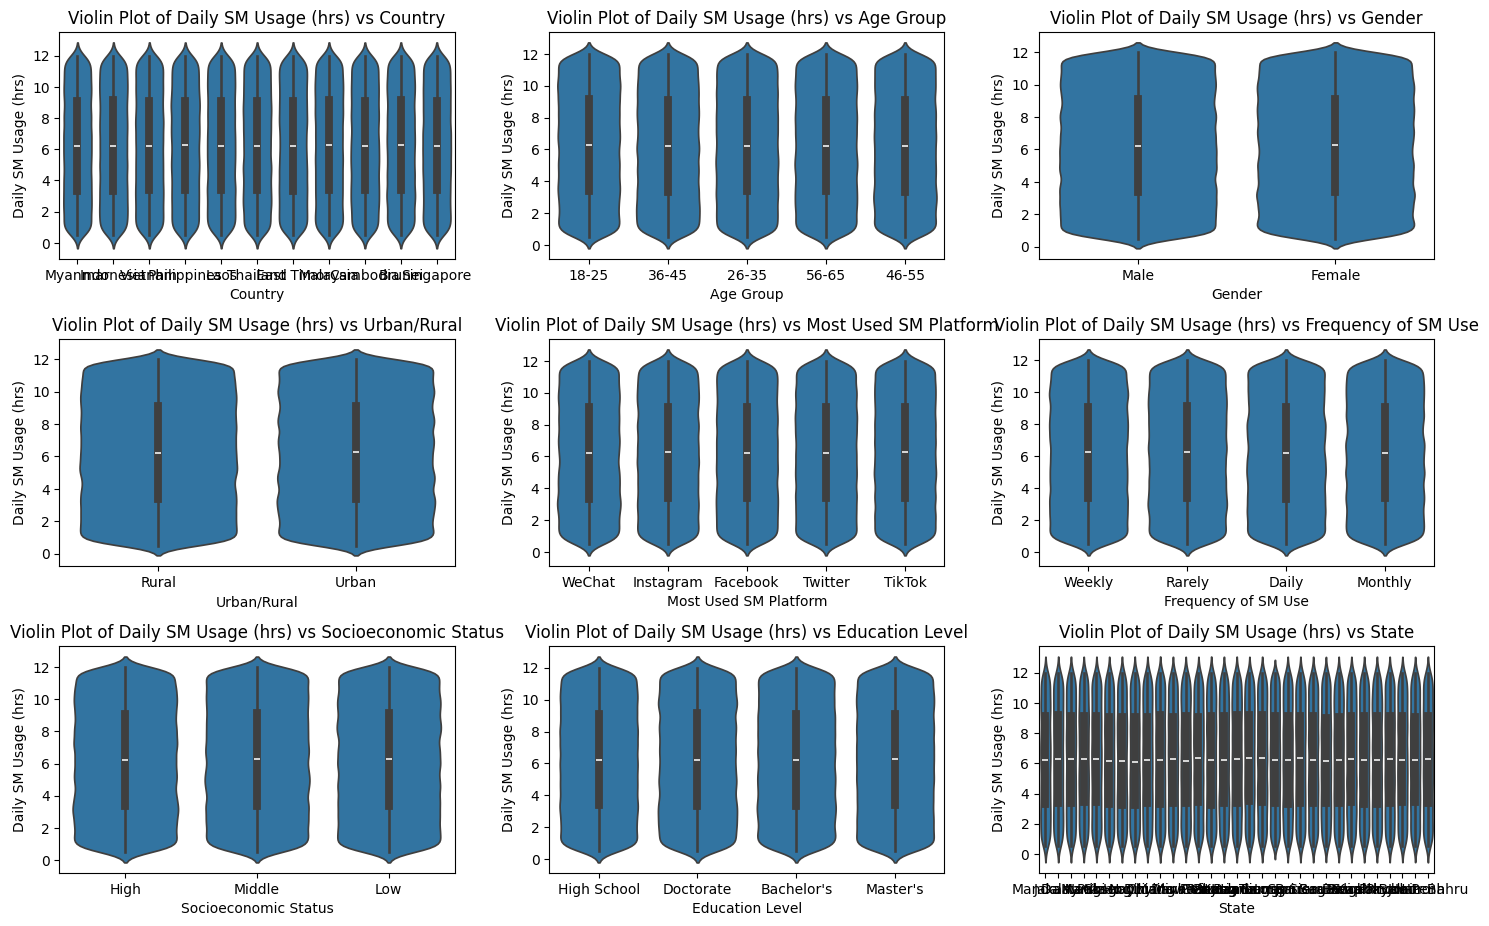

In [11]:
# Violin Plots: Distribution Comparison for Categorical and Numerical Variables
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 12))
for i, cat_col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x=data[cat_col], y=data[numerical_columns[0]])  # Change numerical_columns[0] for different numerical features
    plt.title(f'Violin Plot of {numerical_columns[0]} vs {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(numerical_columns[0])

plt.tight_layout()
plt.show()

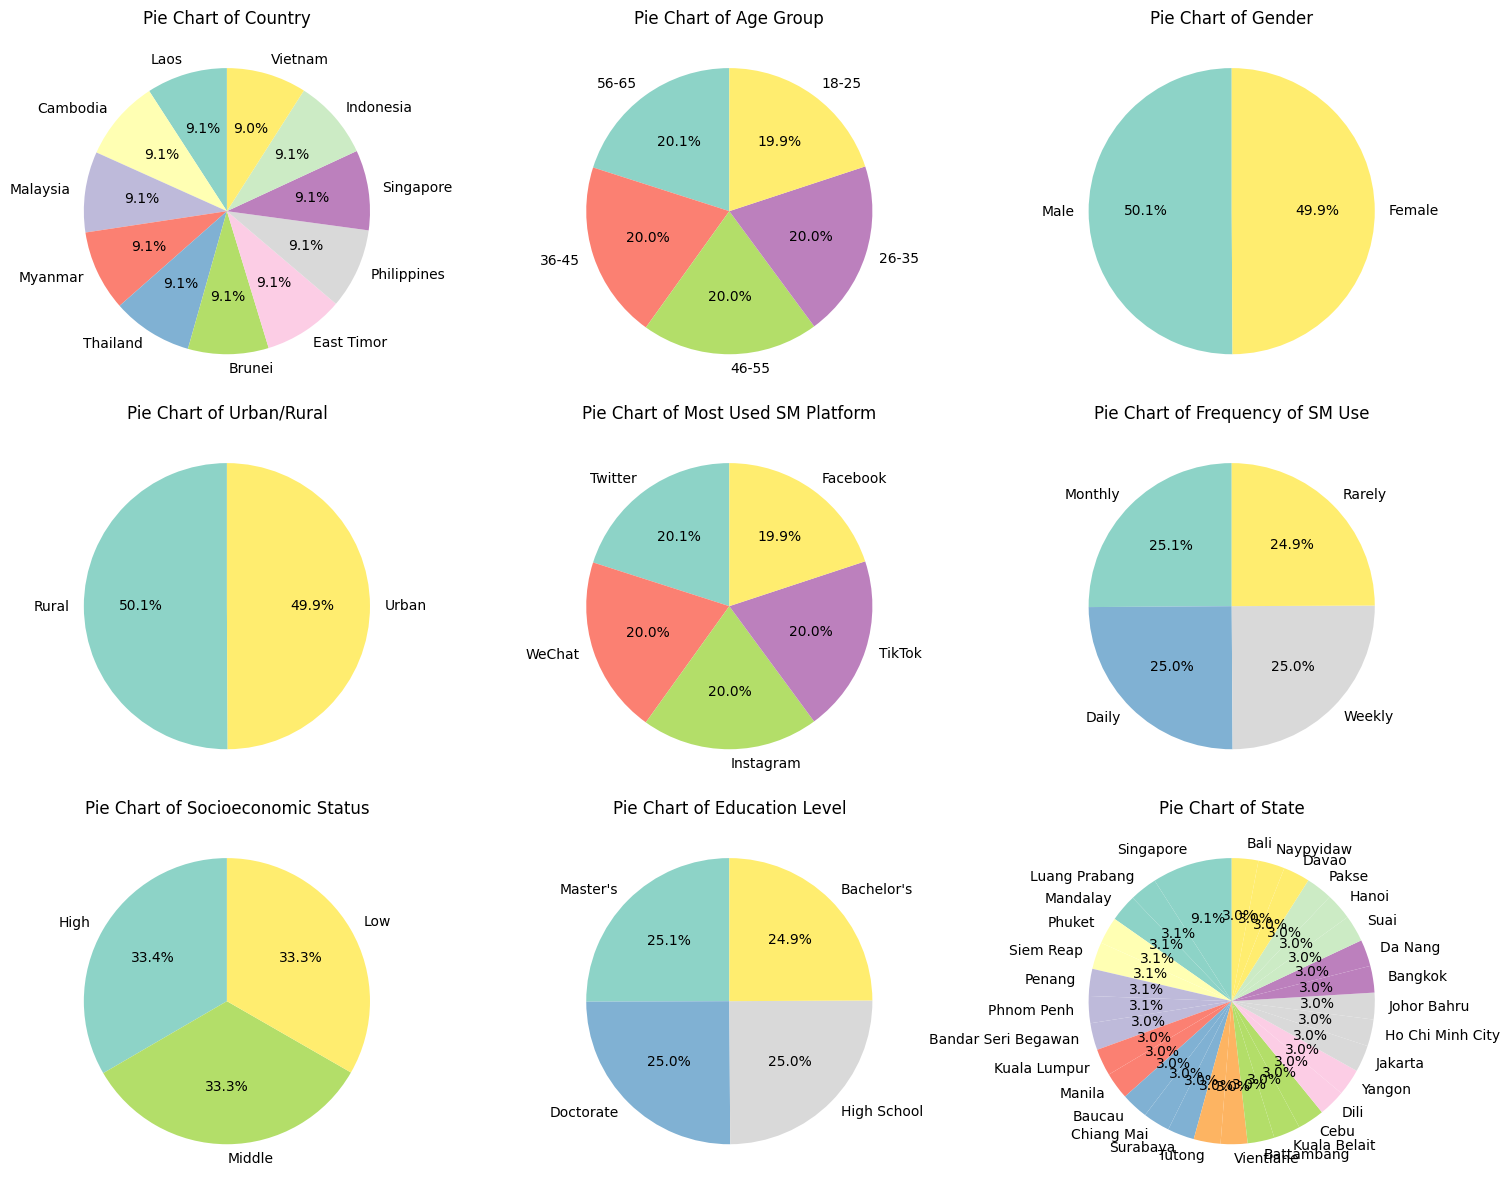

In [12]:
#Pie Chart: Frequency Distribution for Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns  # Identify categorical columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 

    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', ax=plt.gca())
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Remove y-axis label (since it's a pie chart)

plt.tight_layout()
plt.show()

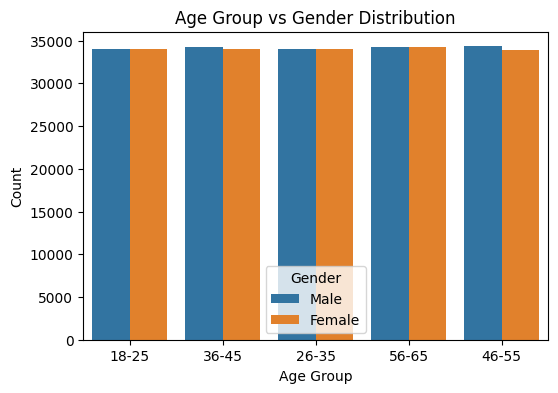

In [13]:
# 3. Stacked Bar Plot: Comparison Across Categories (e.g., 'Gender' vs 'Age Group')
# This is useful when comparing distributions across multiple categorical variables.
# Example: Compare 'Gender' distribution within each 'Age Group'.
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Age Group', hue='Gender')  # Replace 'Age Group' and 'Gender' with your columns
plt.title('Age Group vs Gender Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

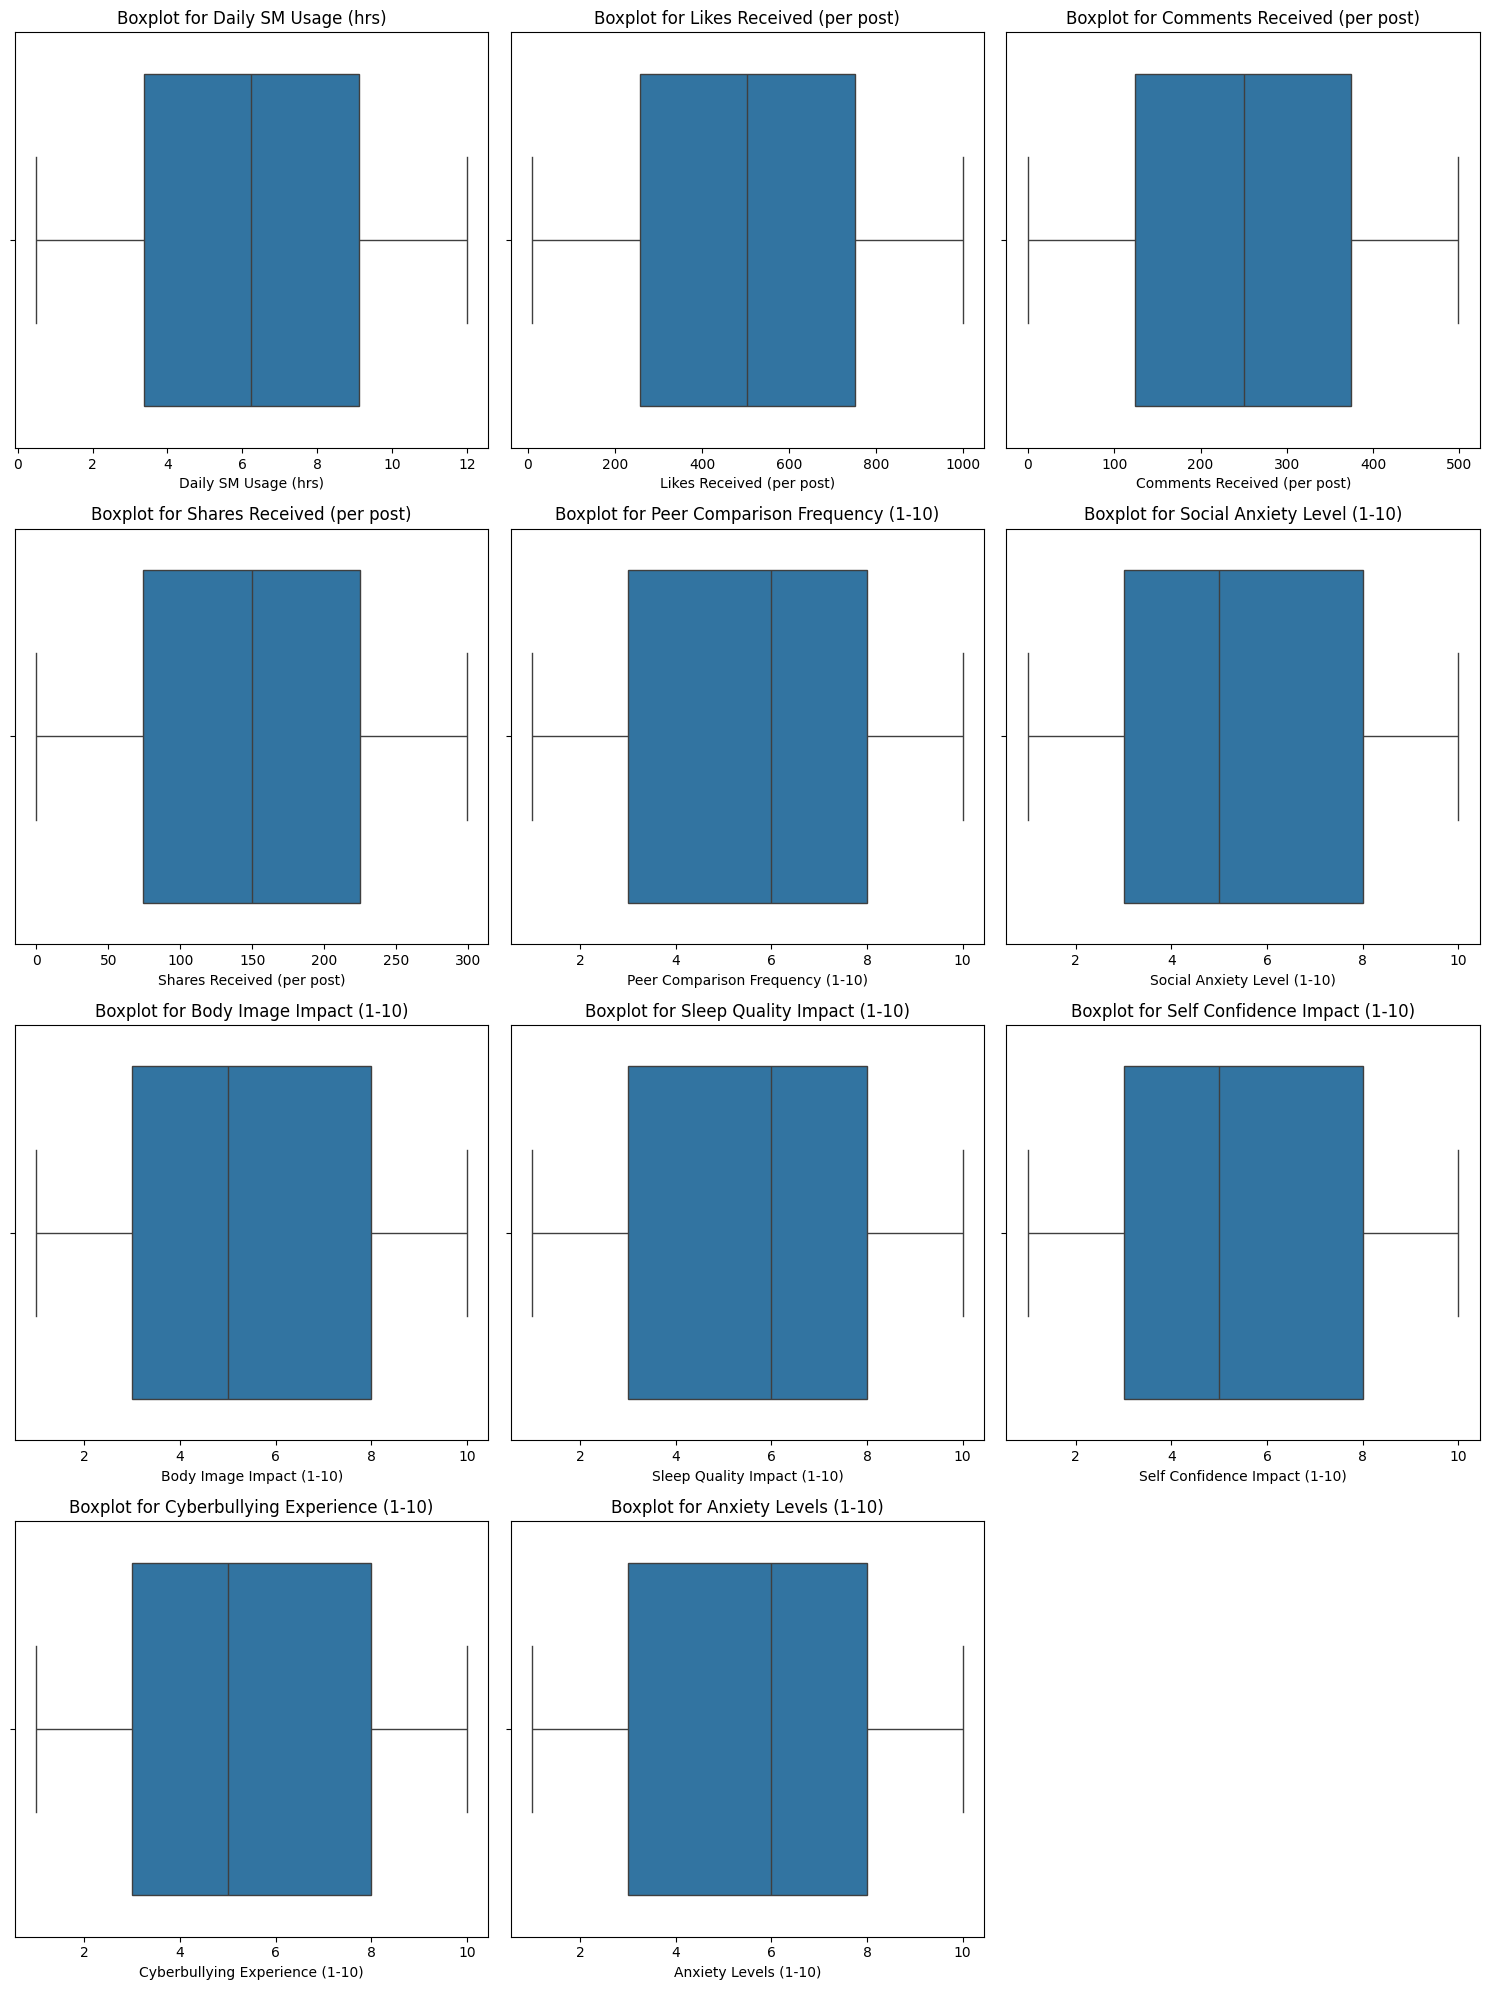

In [14]:
# 4. Visualizations
# Boxplots for numerical variables

# Get numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for the subplots
n_cols = 3  # Define the number of columns per row
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)  # Add an extra row if needed

# Create subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size based on grid dimensions

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)

# Adjust layout to prevent overlap and display all plots
plt.tight_layout()
plt.show()
